# Profile Generation and Visualization
This notebook demonstrates how to generate a synthetic radial intensity profile, add a Gaussian ring, create a 2D image from it, and save the result to a FITS file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")

from diskgen.diskprofile import DiskProfile
from diskgen.plotting import plot_profile
from diskgen.image import create_disk_from_profile
from diskgen.io_utils import save_to_fits


## 1. Create a Power-Law Intensity Profile

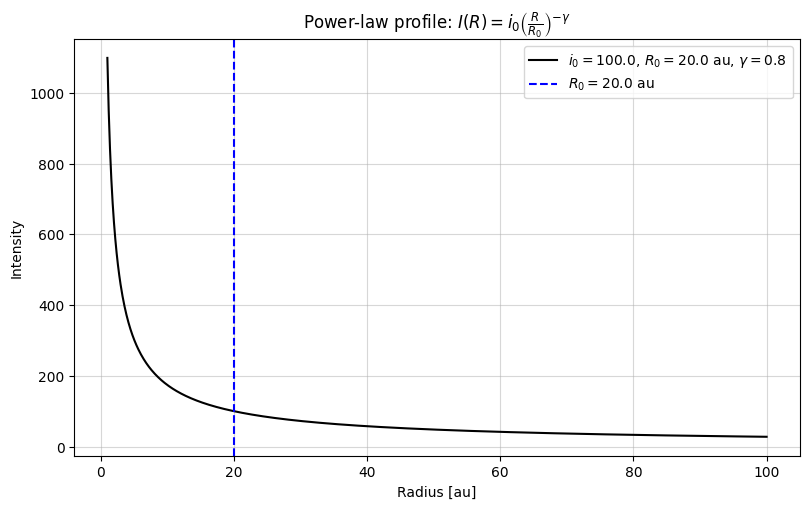

In [2]:
radius = np.linspace(1, 100, 1000)
profile = DiskProfile.powerlaw(radius, i_0=100.0, r_0=20.0, gam=0.8)
plot_profile(profile, i_0=100.0, r_0=20.0, gam=0.8)

## 2. Add a Gaussian Ring

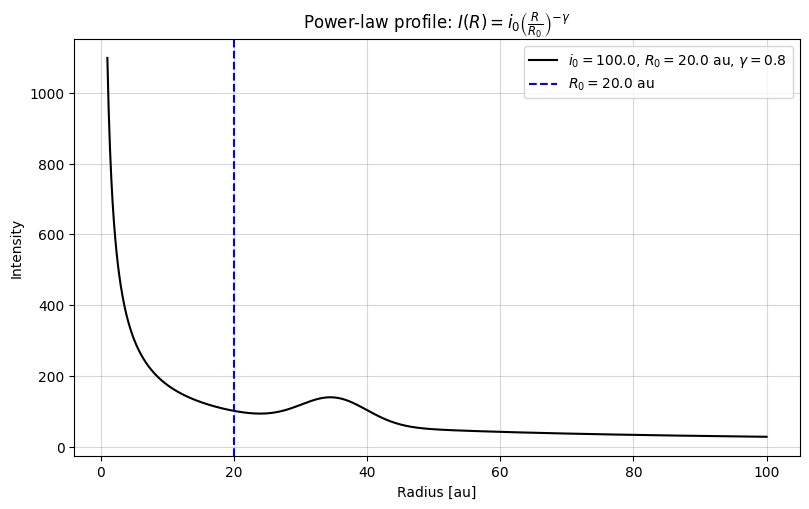

In [3]:
profile.add_ring(ring_radius=35, amplitude=75.0, width=5.0)
plot_profile(profile)

## 2b. Add More! (Optional)

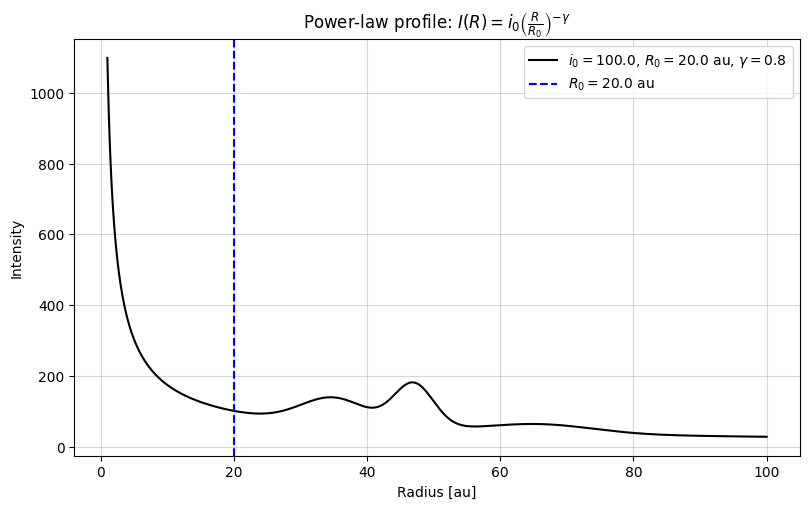

In [4]:
profile.add_ring(ring_radius=47, amplitude=125.0, width=3.0)
profile.add_ring(ring_radius=66, amplitude=25.0, width=8.0)
plot_profile(profile)

## 3. Generate 2D Image from Profile

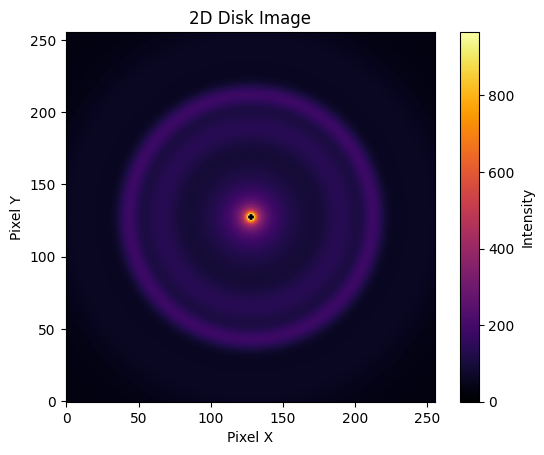

In [5]:
image = create_disk_from_profile(profile, image_size=256)
plt.imshow(image, origin='lower', cmap='inferno')
plt.colorbar(label='Intensity')
plt.title('2D Disk Image')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

## 4. Save Image to FITS File

In [6]:
save_to_fits(image, filename='test_disk_profile.fits')

Saved FITS file to: ..\Output\2025-07-04\test_disk_profile.fits
